In [300]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [301]:
Rtl_data = pd.read_csv('/content/SAIL_DATA2.csv')
Rtl_data.head()

,SL.NO,D.O.P,CUSTOMER ID,INDUSTRY NAME,SEGMENT,UNITS_PURCHASED (TONS),TOTAL AMOUNT,AREA,BRANCH CONTACTED,TYPE,GRADE,THICKNESS(mm),TENURE
0,1.0,2020-01-02,110251.0,Sharma and co.,Food and Beverages,50.0,9000000.0,DELHI,DELHI,Coil,SS 304,0.60,2
1,2.0,2020-01-03,110252.0,SSM and co.,ART,80.0,14400000.0,TAMIL NADU,COIMBATORE,Sheet,SS 310S,0.63,4
2,3.0,2020-01-05,110253.0,Amman and co.,Structural,120.0,21600000.0,TAMIL NADU,CHENNAI,Coil,SS 301,0.50,6
3,4.0,2020-01-07,110254.0,Vasanth and co.,ART,60.0,10800000.0,ANDHRA PRADESH,HYDERABAD,Coil,SS 310S,0.70,4
4,5.0,2020-01-07,110255.0,Alfin Steel industries,ART,70.0,12600000.0,KERALA,CHENNAI,Sheet,SS 304,0.60,8


In [302]:
Rtl_data['SEGMENT'].unique()

array(['Food and Beverages', 'ART', 'Structural', 'Appliances',
       'Chemical', 'ABC', nan], dtype=object)

In [303]:
Rtl_data.dtypes

SL.NO                     float64
D.O.P                      object
CUSTOMER ID               float64
INDUSTRY NAME              object
SEGMENT                    object
UNITS_PURCHASED (TONS)    float64
TOTAL AMOUNT              float64
AREA                       object
BRANCH CONTACTED           object
TYPE                       object
GRADE                      object
THICKNESS(mm)             float64
TENURE                     object
dtype: object

In [304]:
import numpy as np
Rtl_data['TENURE'] = pd.to_numeric(Rtl_data['TENURE'], errors = 'coerce')
#Rtl_data = Rtl_data.replace(np.nan,0,regex = True)
Rtl_data.dropna(axis = 0,inplace = True)

In [305]:
Rtl_data.dtypes

SL.NO                     float64
D.O.P                      object
CUSTOMER ID               float64
INDUSTRY NAME              object
SEGMENT                    object
UNITS_PURCHASED (TONS)    float64
TOTAL AMOUNT              float64
AREA                       object
BRANCH CONTACTED           object
TYPE                       object
GRADE                      object
THICKNESS(mm)             float64
TENURE                    float64
dtype: object

In [306]:
Industry = pd.DataFrame(Rtl_data[["SEGMENT","TOTAL AMOUNT"]])

In [307]:
G = pd.DataFrame(Industry.groupby('SEGMENT').sum({'TOTAL AMOUNT'})).reset_index()
G

,SEGMENT,TOTAL AMOUNT
0,ABC,9.396800e+08
1,ART,2.656220e+09
2,Appliances,1.538400e+09
3,Chemical,1.118520e+09
4,Food and Beverages,1.042640e+09
5,Structural,1.975380e+09


Text(0, 0.5, 'AMOUNT PURCHASED')

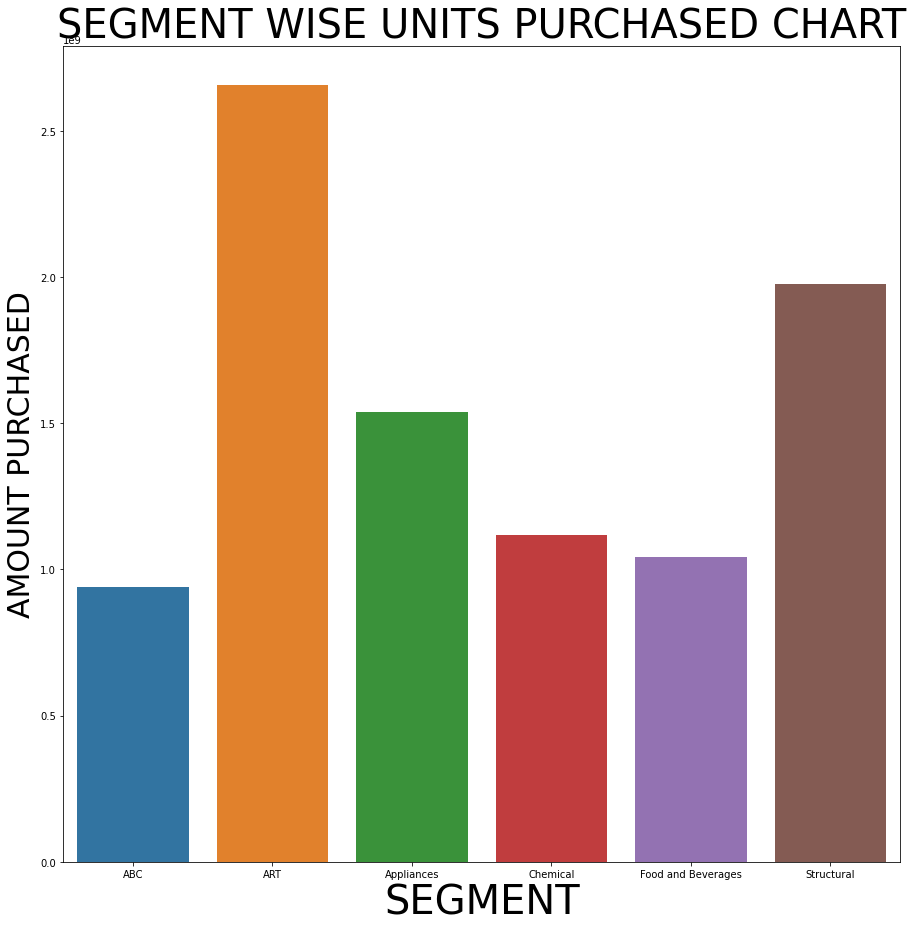

In [308]:
import seaborn as sns
plt.figure(figsize =(15,15))
ax  = sns.barplot(x='SEGMENT',y='TOTAL AMOUNT',data = G)
plt.title("SEGMENT WISE UNITS PURCHASED CHART",fontsize =40)
plt.xlabel('SEGMENT',fontsize =40)
plt.ylabel('AMOUNT PURCHASED',fontsize = 30)

In [309]:
S = pd.DataFrame(Rtl_data.groupby('BRANCH CONTACTED').sum({'TOTAL AMOUNT'})).reset_index()
S= S.drop(columns='THICKNESS(mm)')
S= S.drop(columns = 'SL.NO')
S= S.drop(columns = 'CUSTOMER ID')
S

,BRANCH CONTACTED,UNITS_PURCHASED (TONS),TOTAL AMOUNT,TENURE
0,AHMEDABAD,5733.0,9.995400e+08,1052.0
1,BANGALORE,7966.0,1.395480e+09,1308.0
2,CHENNAI,12644.0,2.236720e+09,2037.0
3,COIMBATORE,8960.0,1.593600e+09,1279.0
4,DELHI,3619.0,6.514200e+08,566.0
5,HYDERABAD,4582.0,8.247600e+08,805.0
6,KOLKATA,3729.0,6.712200e+08,678.0
7,MUMBAI,5045.0,8.981000e+08,897.0


Text(0, 0.5, 'UNITS PURCHASED')

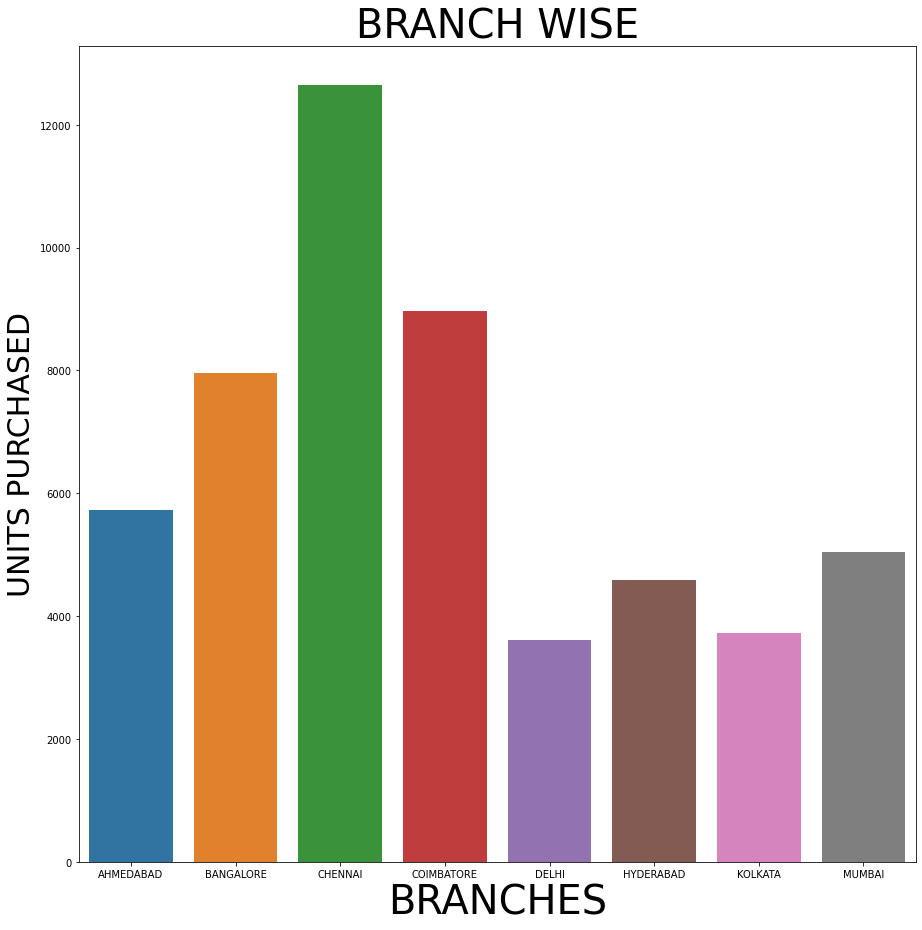

In [310]:
plt.figure(figsize =(15,15))
ax  = sns.barplot(x='BRANCH CONTACTED',y='UNITS_PURCHASED (TONS)',data = S)
plt.title("BRANCH WISE",fontsize =40)
plt.xlabel('BRANCHES',fontsize =40)
plt.ylabel('UNITS PURCHASED',fontsize = 30)

Text(0, 0.5, 'TOTAL AMOUNT')

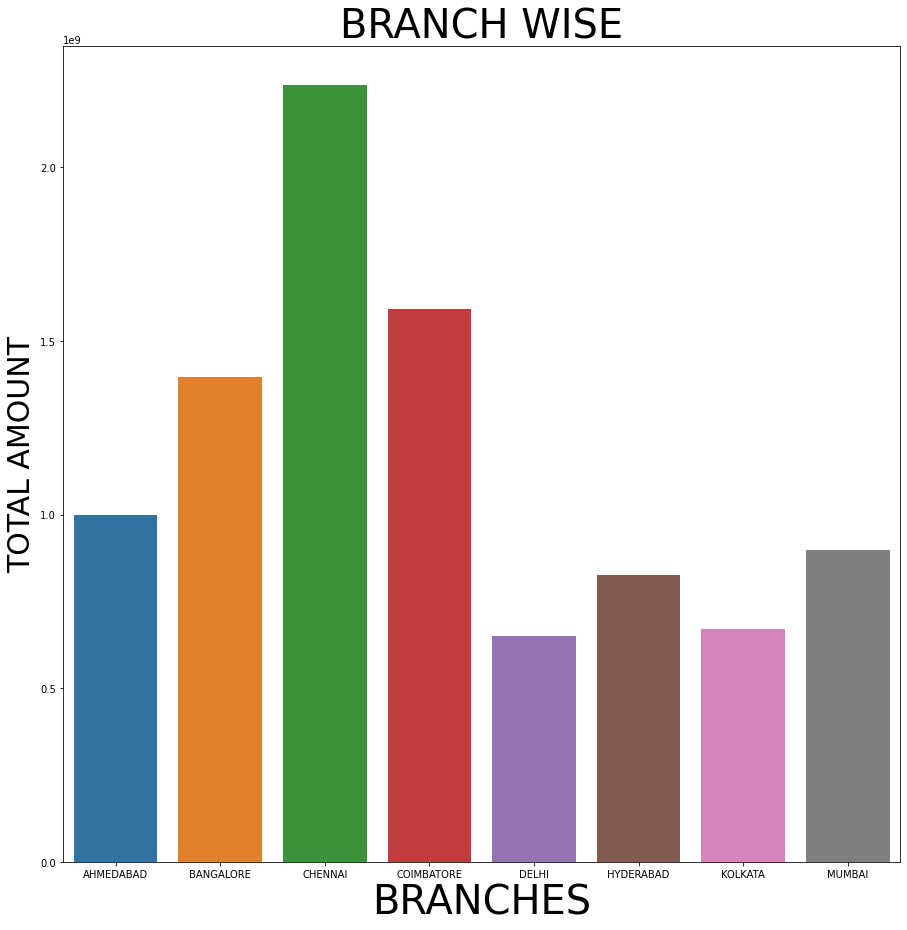

In [311]:
plt.figure(figsize =(15,15))
ax  = sns.barplot(x='BRANCH CONTACTED',y='TOTAL AMOUNT',data = S)
plt.title("BRANCH WISE",fontsize =40)
plt.xlabel('BRANCHES',fontsize =40)
plt.ylabel('TOTAL AMOUNT',fontsize = 30)

In [312]:
F = pd.DataFrame(Rtl_data.groupby('SEGMENT').sum({'TOTAL AMOUNT'})).reset_index()
F= F.drop(columns='THICKNESS(mm)')
F= F.drop(columns = 'SL.NO')
F= F.drop(columns = 'CUSTOMER ID')
F

,SEGMENT,UNITS_PURCHASED (TONS),TOTAL AMOUNT,TENURE
0,ABC,5276.0,9.396800e+08,958.0
1,ART,14979.0,2.656220e+09,2441.0
2,Appliances,8760.0,1.538400e+09,1407.0
3,Chemical,6214.0,1.118520e+09,938.0
4,Food and Beverages,5908.0,1.042640e+09,1101.0
5,Structural,11141.0,1.975380e+09,1777.0


In [313]:
import seaborn as sns

Text(0, 0.5, 'TOTAL AMOUNT')

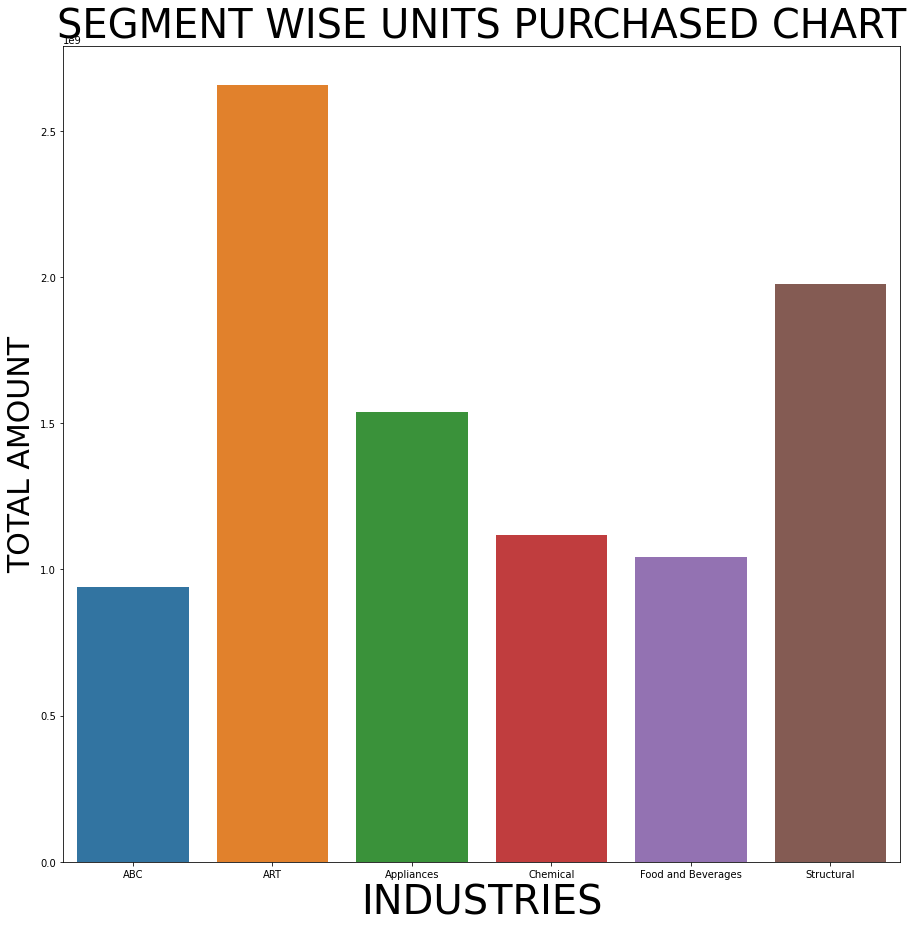

In [314]:
plt.figure(figsize =(15,15))
ax  = sns.barplot(x='SEGMENT',y='TOTAL AMOUNT',data = F)
plt.title("SEGMENT WISE UNITS PURCHASED CHART",fontsize =40)
plt.xlabel('INDUSTRIES',fontsize =40)
plt.ylabel('TOTAL AMOUNT',fontsize = 30)

In [315]:
Rtl_data.shape

(700, 13)

In [316]:
Rtl_data['CUSTOMER ID'].unique().shape

(160,)

In [317]:
Rtl_data['D.O.P'] = pd.to_datetime(Rtl_data['D.O.P'])

In [318]:
import datetime as dt

In [319]:
Latest_Date = dt.datetime(2020,7,31)

In [320]:
'''def f(row):
  if row > 0 and row < 5:
    return 1
  elif row > 4 and row < 10:
    return 4
  elif row > 9 and row < 15:
    return 7
  elif row > 14 and row < 20:
    return 10
  elif row > 19 and row < 25:
    return 13
  else:
    return 16

Rtl_data['TSCORE'] = Rtl_data['TENURE'].apply(f)'''

"def f(row):\n  if row > 0 and row < 5:\n    return 1\n  elif row > 4 and row < 10:\n    return 4\n  elif row > 9 and row < 15:\n    return 7\n  elif row > 14 and row < 20:\n    return 10\n  elif row > 19 and row < 25:\n    return 13\n  else:\n    return 16\n\nRtl_data['TSCORE'] = Rtl_data['TENURE'].apply(f)"

In [321]:
def f(row):
  if row > 0 and row <= 3:
    return 1.3
  elif row > 3 and row <= 6:
    return 2.9 
  elif row > 6 and row <= 9:
    return 4.5
  elif row > 9 and row <= 12:
    return 6.1
  elif row > 12 and row <=15:
    return 7.7
  elif row > 15 and row <= 18:
    return 9.3
  elif row > 18 and row <=21:
    return 10.9
  elif row > 21 and row <= 24:
    return 12.5
  else:
    return 14.1

Rtl_data['TSCORE'] = Rtl_data['TENURE'].apply(f)

In [322]:
Rtl_data['TSCORE'].shape

(700,)

In [323]:
Rtl_data['TENURE'].unique()

array([ 2.,  4.,  6.,  8.,  3.,  9., 13.,  7., 12., 22., 21.,  5., 14.,
       17., 16., 18., 10., 24., 19., 23., 20., 11., 15.])

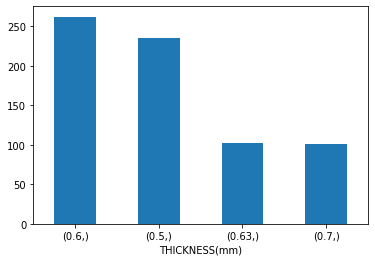

In [324]:
import seaborn as sns
import matplotlib.pyplot as plt
Thickness = Rtl_data['THICKNESS(mm)']
label = pd.DataFrame(Thickness)
label.value_counts().plot.bar(rot=0)


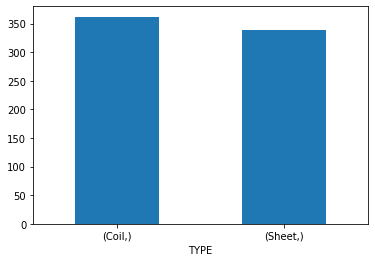

In [325]:
import matplotlib.pyplot as plt
Type = Rtl_data['TYPE']
label1 = pd.DataFrame(Type)
label1.value_counts().plot.bar(rot=0)

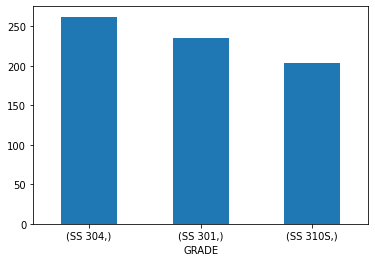

In [326]:
import matplotlib.pyplot as plt
GRADE = Rtl_data['GRADE']
label1 = pd.DataFrame(GRADE)
label1.value_counts().plot.bar(rot=0) 

In [328]:
FMTScores = Rtl_data.groupby('CUSTOMER ID').agg({'CUSTOMER ID': lambda x: len(x) , 'TOTAL AMOUNT': lambda x: x.sum(), 'TSCORE': lambda x : x.sum(),'D.O.P': lambda x: (Latest_Date - x.max()).days})
FMTScores['D.O.P'] = FMTScores['D.O.P'].astype(int)

In [329]:
FMTScores.head()

,CUSTOMER ID,TOTAL AMOUNT,TSCORE,D.O.P
CUSTOMER ID,,,,
110032.0,7.0,54540000.0,65.1,6
110033.0,7.0,100260000.0,87.5,6
110034.0,7.0,116820000.0,42.7,6
110035.0,7.0,99360000.0,87.5,5
110036.0,7.0,68400000.0,65.1,5


In [330]:
FMTScores['TSCORE'].unique()

array([ 65.1,  87.5,  42.7,  46.5,  22.5,  55.8,  62.5,   2.6,   5.8,
         8.7,  13.5,   3.9,  18. ,  30.8,  11.6,  38.5,  30.5,  75. ,
        13.2,  43.6,  24.4,  27. ,  46.2,  36.6,  53.9,  76.3, 100. ,
        87.2,  74.4,   5.2,  18.3,   7.4,  54.5,  65.4,  14.5,  20.3,
        23.1])

In [335]:
FMTScores.rename(columns={'CUSTOMER ID': 'Frequency', 
                         'TOTAL AMOUNT': 'Monetary',
                         'D.O.P': 'Recency'}, inplace=True)
FMTScores['TSCORE'] = FMTScores['TSCORE']/FMTScores['Frequency']
FMTScores.reset_index().head(10)

,CUSTOMER ID,Frequency,Monetary,TSCORE,Recency
0,110032.0,7.0,54540000.0,1.328571,6
1,110033.0,7.0,100260000.0,1.785714,6
2,110034.0,7.0,116820000.0,0.871429,6
3,110035.0,7.0,99360000.0,1.785714,5
4,110036.0,7.0,68400000.0,1.328571,5
5,110037.0,5.0,60300000.0,1.860000,5
6,110038.0,5.0,88200000.0,0.900000,4
7,110039.0,6.0,95400000.0,1.550000,4
8,110040.0,6.0,89100000.0,1.550000,4
9,110041.0,5.0,63900000.0,2.500000,3


In [334]:
FMTScores['Recency'].unique()

array([  6,   5,   4,   3,  24,  25,  60,  59,  58, 125,  21,  20,  19,
        42,  41,  40,   2,   1,   0, 179,  33,  32,  31,  15,  14,  13,
        12,  53,  52,  51,  50,   8,   7,  37,  36,  35,  39,  38,  29,
        28,  27,  18,  17,  16,  23,  22,  11,  10,   9])

In [336]:
FMTScores.to_csv('FMTrecency.csv')

In [337]:
FMTScores['TSCORE'].unique()

array([1.32857143, 1.78571429, 0.87142857, 1.86      , 0.9       ,
       1.55      , 2.5       , 0.65      , 1.45      , 0.96666667,
       1.5       , 0.43333333, 1.125     , 1.925     , 0.725     ,
       1.54      , 1.22      , 2.08333333, 0.825     , 2.725     ,
       1.525     , 0.75      , 1.28333333, 1.01666667, 1.1       ,
       1.55714286, 1.5625    , 1.3625    , 1.1625    , 0.325     ,
       2.03333333, 1.85      , 2.18      , 1.81666667, 0.58      ,
       0.41428571, 2.56666667])

In [338]:
FMTScores.to_csv('FMTscore.csv')

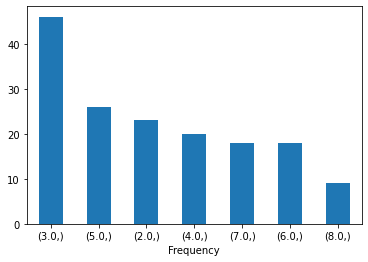

In [339]:
import matplotlib.pyplot as plt
Frequency= FMTScores['Frequency']
plotf = pd.DataFrame(Frequency)
plotf.value_counts().plot.bar(rot=0)

In [340]:
FMTScores.Frequency.describe()

count    160.000000
mean       4.375000
std        1.807566
min        2.000000
25%        3.000000
50%        4.000000
75%        6.000000
max        8.000000
Name: Frequency, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



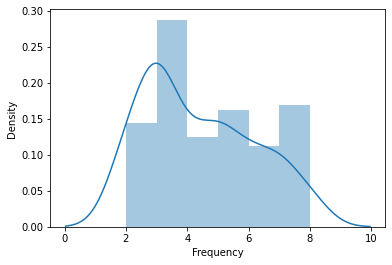

In [341]:
import seaborn as sns
x = FMTScores['Frequency']

ax = sns.distplot(x)

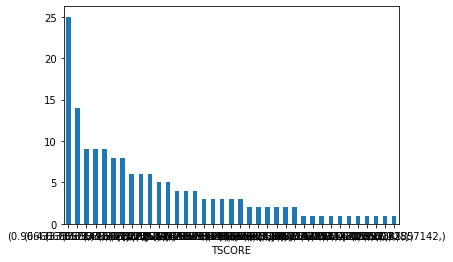

In [342]:
import matplotlib.pyplot as plt
TSCORE= FMTScores['TSCORE']
plotf = pd.DataFrame(TSCORE)
plotf.value_counts().plot.bar(rot=0)

In [343]:
FMTScores.TSCORE.describe()

count    160.000000
mean       1.196822
std        0.478835
min        0.325000
25%        0.900000
50%        1.125000
75%        1.528750
max        2.725000
Name: TSCORE, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



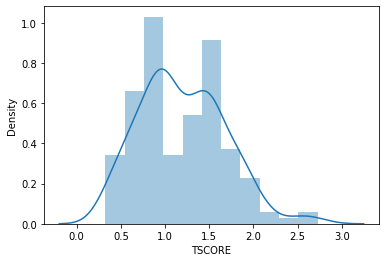

In [344]:
import seaborn as sns
x = FMTScores['TSCORE']

ax = sns.distplot(x)

In [345]:
FMTScores.Monetary.describe()

count    1.600000e+02
mean     5.794275e+07
std      2.790813e+07
min      1.440000e+07
25%      3.402000e+07
50%      5.355000e+07
75%      7.660500e+07
max      1.254600e+08
Name: Monetary, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



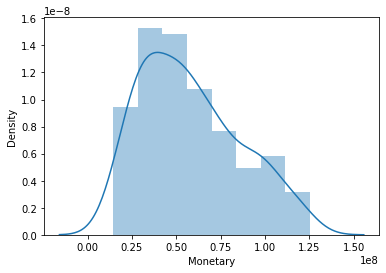

In [349]:
import seaborn as sns
x = FMTScores.query('Monetary < 100000000000')['Monetary']

ax = sns.distplot(x)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



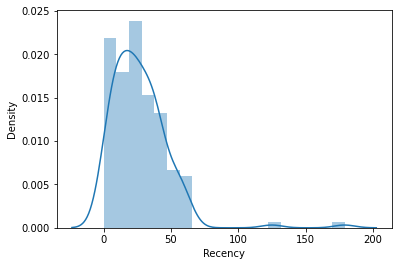

In [348]:
import seaborn as sns
x = FMTScores['Recency']

ax = sns.distplot(x)

In [350]:
FMTScores.Recency.describe()

count    160.000000
mean      26.806250
std       21.644787
min        0.000000
25%       12.000000
50%       24.000000
75%       38.000000
max      179.000000
Name: Recency, dtype: float64

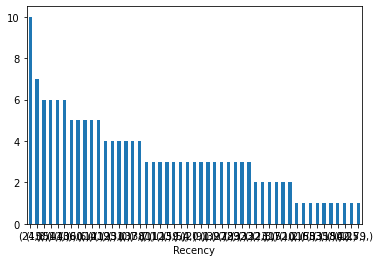

In [351]:
import matplotlib.pyplot as plt
Recency= FMTScores['Recency']
plotf = pd.DataFrame(Recency)
plotf.value_counts().plot.bar(rot=0)

In [352]:
quantiles = FMTScores.quantile(q=[0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90])
quantiles = quantiles.to_dict()
quantiles

{'Frequency': {0.1: 2.0,
  0.2: 3.0,
  0.3: 3.0,
  0.4: 3.0,
  0.5: 4.0,
  0.6: 5.0,
  0.7: 5.0,
  0.8: 6.0,
  0.9: 7.0},
 'Monetary': {0.1: 25110000.0,
  0.2: 32096000.0,
  0.3: 37296000.0,
  0.4: 46668000.0,
  0.5: 53550000.0,
  0.6: 61523999.99999997,
  0.7: 70218000.0,
  0.8: 83412000.0,
  0.9: 100278000.0},
 'Recency': {0.1: 5.9,
  0.2: 9.0,
  0.3: 14.0,
  0.4: 19.6,
  0.5: 24.0,
  0.6: 28.39999999999999,
  0.7: 36.0,
  0.8: 40.0,
  0.9: 51.0},
 'TSCORE': {0.1: 0.65,
  0.2: 0.725,
  0.3: 0.9666666666666667,
  0.4: 0.9666666666666667,
  0.5: 1.125,
  0.6: 1.3285714285714285,
  0.7: 1.5,
  0.8: 1.5499999999999998,
  0.9: 1.8166666666666667}}

In [353]:
def FScoring(x,p,d):
    if x <= d[p][0.10]:
        return 1
    elif x <= d[p][0.20]:
        return 2.3
    elif x <= d[p][0.30]:
        return 3.6
    elif x <= d[p][0.40]:
        return 4.9
    elif x <= d[p][0.50]:
        return 6.2
    elif x <= d[p][0.60]: 
        return 7.5
    elif x <= d[p][0.70]:
        return 9
    elif x <= d[p][0.80]:
        return 10.3
    elif x <= d[p][0.90]:
        return 11.6
    else:
        return 12.9
def Mscoring(x,p,d):
    if x <= d[p][0.10]:
        return 20.5
    elif x <= d[p][0.20]:
        return 40.10
    elif x <= d[p][0.30]:
        return 60.15
    elif x <= d[p][0.40]:
        return 80.20
    elif x <= d[p][0.50]:
        return 100.25
    elif x <= d[p][0.60]: 
        return 120.30
    elif x <= d[p][0.70]:
        return 140.35
    elif x <= d[p][0.80]:
        return 160.40
    elif x <= d[p][0.90]:
        return 180.45
    else:
        return 200.50
def Rscoring(x,p,d):
    if x <= d[p][0.10]:
        return 5
    elif x <= d[p][0.20]:
        return 3.7
    elif x <= d[p][0.30]:
        return 2.4
    elif x <= d[p][0.40]:
        return 1.1
    elif x <= d[p][0.50]:
        return -0.2
    elif x <= d[p][0.60]: 
        return -1.5
    elif x <= d[p][0.70]:
        return -2.8
    elif x <= d[p][0.80]:
        return -4.1
    elif x <= d[p][0.90]:
        return -5.4
    else:
        return -10

In [356]:
FMTScores['R'] = FMTScores['Recency'].apply(Rscoring, args=('Recency',quantiles,))
FMTScores['F'] = FMTScores['Frequency'].apply(FScoring, args=('Frequency',quantiles,))
FMTScores['M'] = FMTScores['Monetary'].apply(Mscoring, args=('Monetary',quantiles,))
FMTScores.head()

,Frequency,Monetary,TSCORE,Recency,R,F,M
CUSTOMER ID,,,,,,,
110032.0,7.0,54540000.0,1.328571,6,3.7,11.6,120.30
110033.0,7.0,100260000.0,1.785714,6,3.7,11.6,180.45
110034.0,7.0,116820000.0,0.871429,6,3.7,11.6,200.50
110035.0,7.0,99360000.0,1.785714,5,5.0,11.6,180.45
110036.0,7.0,68400000.0,1.328571,5,5.0,11.6,140.35


In [357]:
FMTScores['F'].unique()

array([11.6,  7.5, 10.3,  1. ,  2.3,  6.2, 12.9])

In [359]:
FMTScores['FMTGroup'] = FMTScores.F.map(str) + FMTScores.M.map(str) + FMTScores.TSCORE.map(str) + FMTScores.Recency.map(str)


In [361]:
FMTScores['FMTScore'] = FMTScores[['F', 'M','TSCORE','R']].sum(axis = 1)
FMTScores.head()

,Frequency,Monetary,TSCORE,Recency,R,F,M,FMTGroup,FMTScore
CUSTOMER ID,,,,,,,,,
110032.0,7.0,54540000.0,1.328571,6,3.7,11.6,120.30,11.6120.31.32857142857142856,136.928571
110033.0,7.0,100260000.0,1.785714,6,3.7,11.6,180.45,11.6180.451.78571428571428586,197.535714
110034.0,7.0,116820000.0,0.871429,6,3.7,11.6,200.50,11.6200.50.87142857142857166,216.671429
110035.0,7.0,99360000.0,1.785714,5,5.0,11.6,180.45,11.6180.451.78571428571428585,198.835714
110036.0,7.0,68400000.0,1.328571,5,5.0,11.6,140.35,11.6140.351.32857142857142855,158.278571


In [362]:
print(FMTScores['FMTScore'].min())
print(FMTScores['FMTScore'].max())


18.049999999999997
216.67142857142855


In [363]:
Loyalty_Level = ['Bronze', 'Silver', 'Gold', 'Platinum']
Score_cuts = pd.qcut(FMTScores.FMTScore, q = 4, labels = Loyalty_Level)
FMTScores['FMT_Loyalty_Level'] = Score_cuts.values
FMTScores.reset_index().head()

,CUSTOMER ID,Frequency,Monetary,TSCORE,Recency,R,F,M,FMTGroup,FMTScore,FMT_Loyalty_Level
0,110032.0,7.0,54540000.0,1.328571,6,3.7,11.6,120.30,11.6120.31.32857142857142856,136.928571,Gold
1,110033.0,7.0,100260000.0,1.785714,6,3.7,11.6,180.45,11.6180.451.78571428571428586,197.535714,Platinum
2,110034.0,7.0,116820000.0,0.871429,6,3.7,11.6,200.50,11.6200.50.87142857142857166,216.671429,Platinum
3,110035.0,7.0,99360000.0,1.785714,5,5.0,11.6,180.45,11.6180.451.78571428571428585,198.835714,Platinum
4,110036.0,7.0,68400000.0,1.328571,5,5.0,11.6,140.35,11.6140.351.32857142857142855,158.278571,Gold


In [364]:
pip install chart_studio

In [410]:
import chart_studio as cs
import plotly.offline as po
import plotly.graph_objs as gobj

#TSCORE Vs Frequency
graph = FMTScores.query("Monetary < 500000000000 and Frequency < 2000")

plot_data = [
    gobj.Scatter(
        x=graph.query("FMT_Loyalty_Level == 'Platinum'")['TSCORE'],
        y=graph.query("FMT_Loyalty_Level == 'Platinum'")['Frequency'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.9
           )
    ),
        gobj.Scatter(
        x=graph.query("FMT_Loyalty_Level == 'Gold'")['TSCORE'],
        y=graph.query("FMT_Loyalty_Level == 'Gold'")['Frequency'],
        mode='markers',
        name='Gold',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'green',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("FMT_Loyalty_Level == 'Silver'")['TSCORE'],
        y=graph.query("FMT_Loyalty_Level == 'Silver'")['Frequency'],
        mode='markers',
        name='Silver',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'red',
            opacity= 0.7
           )
    ),
    gobj.Scatter(
        x=graph.query("FMT_Loyalty_Level == 'Bronze'")['TSCORE'],
        y=graph.query("FMT_Loyalty_Level == 'Bronze'")['Frequency'],
        mode='markers',
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'black',
            opacity= 0.6
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Frequency"},
        xaxis= {'title': "TSCORE"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

#Frequency Vs Monetary
graph = FMTScores.query("Monetary < 50000000000 and Frequency < 20")

plot_data = [
    gobj.Scatter(
        x=graph.query("FMT_Loyalty_Level == 'Bronze'")['Frequency'],
        y=graph.query("FMT_Loyalty_Level == 'Bronze'")['Monetary'],
        mode='markers',
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'black',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("FMT_Loyalty_Level == 'Silver'")['Frequency'],
        y=graph.query("FMT_Loyalty_Level == 'Silver'")['Monetary'],
        mode='markers',
        name='Silver',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'red',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=graph.query("FMT_Loyalty_Level == 'Gold'")['Frequency'],
        y=graph.query("FMT_Loyalty_Level == 'Gold'")['Monetary'],
        mode='markers',
        name='Gold',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'green',
            opacity= 0.9
           )
    ),
    gobj.Scatter(
        x=graph.query("FMT_Loyalty_Level == 'Platinum'")['Frequency'],
        y=graph.query("FMT_Loyalty_Level == 'Platinum'")['Monetary'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Monetary"},
        xaxis= {'title': "Frequency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

#Recency Vs Monetary
graph = FMTScores.query("Monetary < 50000000000 and Frequency < 20")

plot_data = [
    gobj.Scatter(
        x=graph.query("FMT_Loyalty_Level == 'Bronze'")['Recency'],
        y=graph.query("FMT_Loyalty_Level == 'Bronze'")['Monetary'],
        mode='markers',
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("FMT_Loyalty_Level == 'Silver'")['Recency'],
        y=graph.query("FMT_Loyalty_Level == 'Silver'")['Monetary'],
        mode='markers',
        name='Silver',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=graph.query("FMT_Loyalty_Level == 'Gold'")['Recency'],
        y=graph.query("FMT_Loyalty_Level == 'Gold'")['Monetary'],
        mode='markers',
        name='Gold',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter(
        x=graph.query("FMT_Loyalty_Level == 'Platinum'")['Recency'],
        y=graph.query("FMT_Loyalty_Level == 'Platinum'")['Monetary'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Monetary"},
        xaxis= {'title': "Recency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

#TSCORE AND MONETARY
graph = FMTScores.query("Monetary < 50000000000 and Frequency < 20")

plot_data = [
    gobj.Scatter(
        x=graph.query("FMT_Loyalty_Level == 'Bronze'")['TSCORE'],
        y=graph.query("FMT_Loyalty_Level == 'Bronze'")['Monetary'],
        mode='markers',
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("FMT_Loyalty_Level == 'Silver'")['TSCORE'],
        y=graph.query("FMT_Loyalty_Level == 'Silver'")['Monetary'],
        mode='markers',
        name='Silver',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=graph.query("FMT_Loyalty_Level == 'Gold'")['TSCORE'],
        y=graph.query("FMT_Loyalty_Level == 'Gold'")['Monetary'],
        mode='markers',
        name='Gold',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter(
        x=graph.query("FMT_Loyalty_Level == 'Platinum'")['TSCORE'],
        y=graph.query("FMT_Loyalty_Level == 'Platinum'")['Monetary'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Monetary"},
        xaxis= {'title': "TSCORE"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

#TSCORE AND Recency
graph = FMTScores.query("Monetary < 50000000000 and Frequency < 20")

plot_data = [
    gobj.Scatter(
        x=graph.query("FMT_Loyalty_Level == 'Bronze'")['TSCORE'],
        y=graph.query("FMT_Loyalty_Level == 'Bronze'")['Recency'],
        mode='markers',
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("FMT_Loyalty_Level == 'Silver'")['TSCORE'],
        y=graph.query("FMT_Loyalty_Level == 'Silver'")['Recency'],
        mode='markers',
        name='Silver',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=graph.query("FMT_Loyalty_Level == 'Gold'")['TSCORE'],
        y=graph.query("FMT_Loyalty_Level == 'Gold'")['Recency'],
        mode='markers',
        name='Gold',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter(
        x=graph.query("FMT_Loyalty_Level == 'Platinum'")['TSCORE'],
        y=graph.query("FMT_Loyalty_Level == 'Platinum'")['Recency'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Monetary"},
        xaxis= {'title': "Recency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

#Frequency AND Recency
graph = FMTScores.query("Monetary < 50000000000 and Frequency < 20")

plot_data = [
    gobj.Scatter(
        x=graph.query("FMT_Loyalty_Level == 'Bronze'")['Frequency'],
        y=graph.query("FMT_Loyalty_Level == 'Bronze'")['Recency'],
        mode='markers',
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("FMT_Loyalty_Level == 'Silver'")['Frequency'],
        y=graph.query("FMT_Loyalty_Level == 'Silver'")['Recency'],
        mode='markers',
        name='Silver',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=graph.query("FMT_Loyalty_Level == 'Gold'")['Frequency'],
        y=graph.query("FMT_Loyalty_Level == 'Gold'")['Recency'],
        mode='markers',
        name='Gold',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter(
        x=graph.query("FMT_Loyalty_Level == 'Platinum'")['Frequency'],
        y=graph.query("FMT_Loyalty_Level == 'Platinum'")['Recency'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Recency"},
        xaxis= {'title': "Frequency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)


In [378]:
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num

FMTScores['TSCORE'] = [handle_neg_n_zero(x) for x in FMTScores.TSCORE]
FMTScores['Monetary'] = [handle_neg_n_zero(x) for x in FMTScores.Monetary]

Log_Tfd_Data = FMTScores[['Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



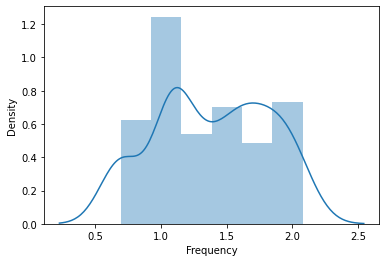

In [379]:
Frequency_Plot = Log_Tfd_Data['Frequency']
ax = sns.distplot(Frequency_Plot)


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



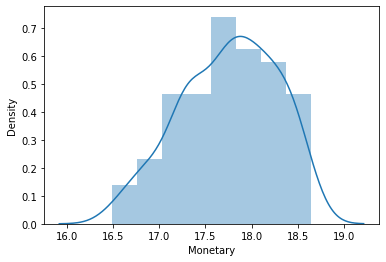

In [380]:
Monetary_Plot = Log_Tfd_Data.query('Monetary < 100000000')['Monetary']
ax = sns.distplot(Monetary_Plot)

In [381]:
#Frequency_Plot = Log_Tfd_Data.query('Frequency < 100')['Frequency']
#ax = sns.distplot(Frequency_Plot)

In [382]:
from sklearn.preprocessing import StandardScaler

#Bring the data on same scale
scaleobj = StandardScaler()
Scaled_Data = scaleobj.fit_transform(Log_Tfd_Data)

#Transform it back to dataframe
Scaled_Data = pd.DataFrame(Scaled_Data, index = FMTScores.index, columns = Log_Tfd_Data.columns)

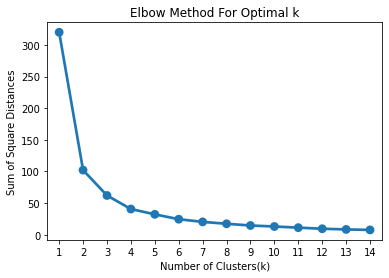

In [383]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(Scaled_Data)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [384]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 4, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(Scaled_Data)

#Find the clusters for the observation given in the dataset
FMTScores['Cluster'] = KMean_clust.labels_
FMTScores.head()

,Frequency,Monetary,TSCORE,Recency,R,F,M,FMTGroup,FMTScore,FMT_Loyalty_Level,Cluster
CUSTOMER ID,,,,,,,,,,,
110032.0,7.0,54540000.0,1.328571,6,3.7,11.6,120.30,11.6120.31.32857142857142856,136.928571,Gold,1
110033.0,7.0,100260000.0,1.785714,6,3.7,11.6,180.45,11.6180.451.78571428571428586,197.535714,Platinum,1
110034.0,7.0,116820000.0,0.871429,6,3.7,11.6,200.50,11.6200.50.87142857142857166,216.671429,Platinum,1
110035.0,7.0,99360000.0,1.785714,5,5.0,11.6,180.45,11.6180.451.78571428571428585,198.835714,Platinum,1
110036.0,7.0,68400000.0,1.328571,5,5.0,11.6,140.35,11.6140.351.32857142857142855,158.278571,Gold,1


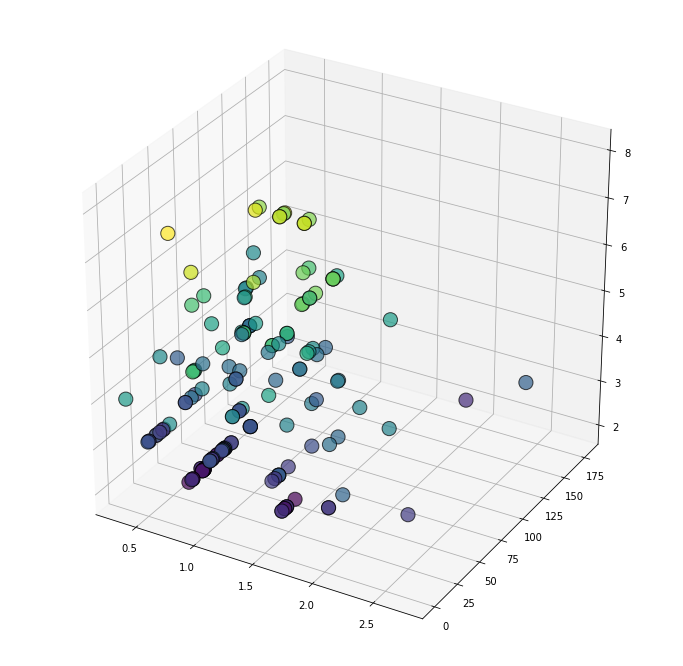

In [386]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

x = FMTScores['TSCORE']
y = FMTScores['Recency']
z = FMTScores['Frequency']

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=FMTScores['Monetary'])
plt.show()

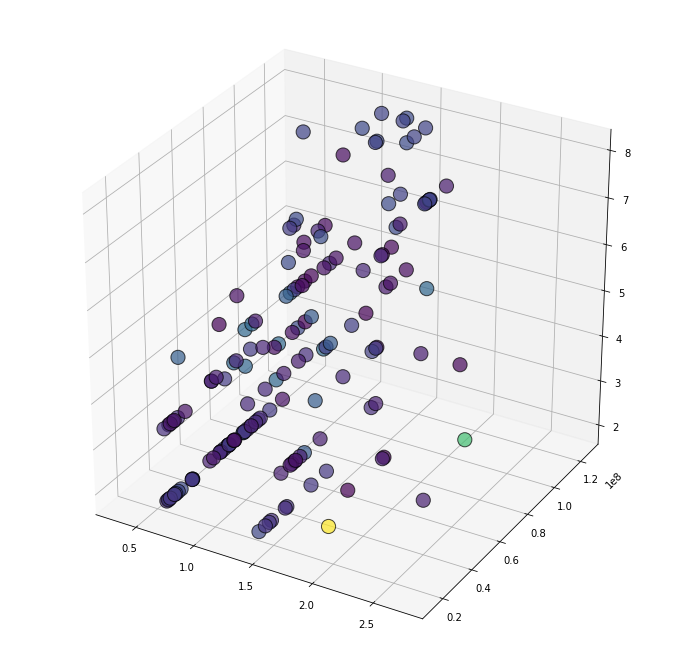

In [392]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

x = FMTScores['TSCORE']
y = FMTScores['Monetary']
z = FMTScores['Frequency']

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=FMTScores['Recency'])
plt.show()

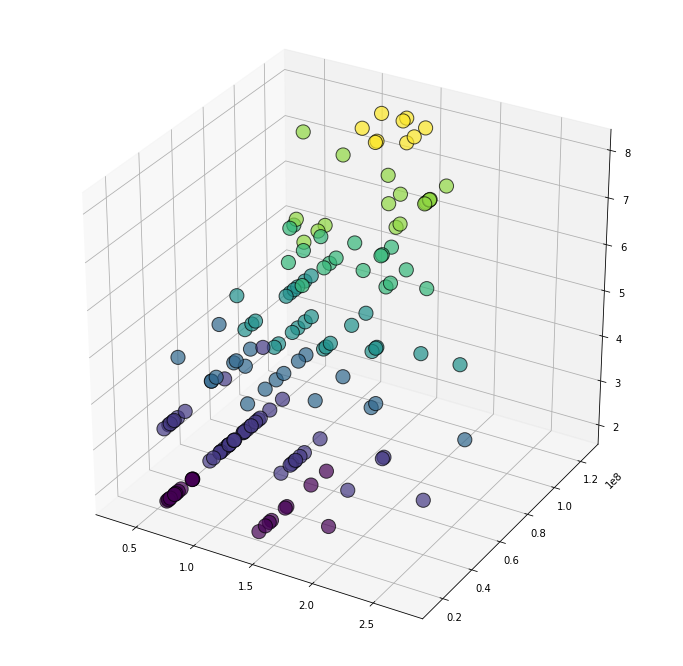

In [393]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

x = FMTScores['TSCORE']
y = FMTScores['Monetary']
z = FMTScores['Frequency']

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=z)
plt.show()

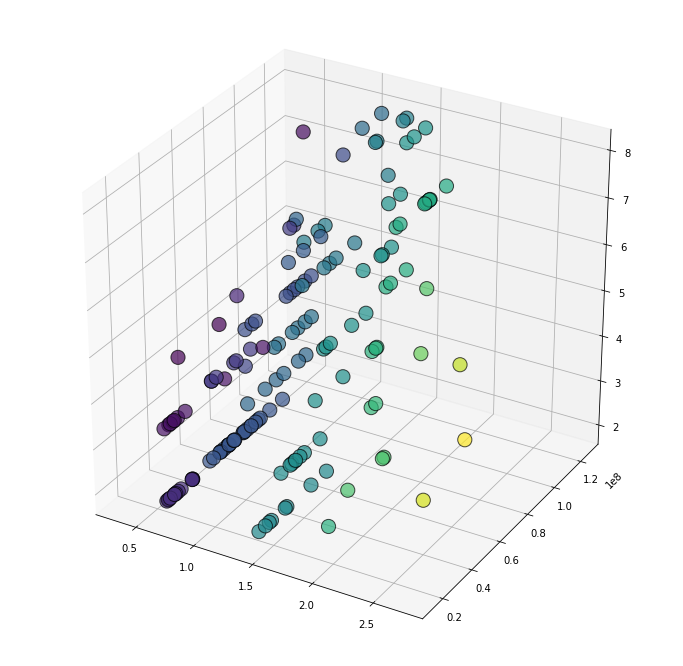

In [394]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

x = FMTScores['TSCORE']
y = FMTScores['Monetary']
z = FMTScores['Frequency']

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=x)
plt.show()

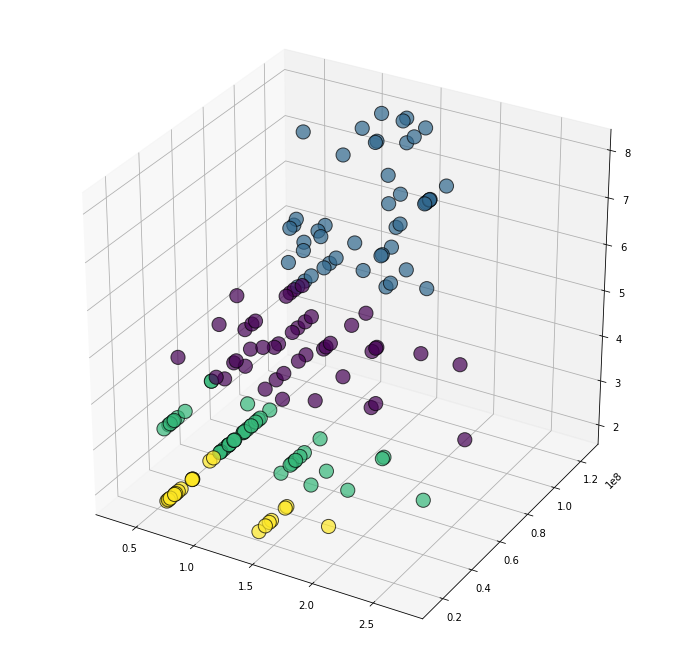

In [395]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

x = FMTScores['TSCORE']
y = FMTScores['Monetary']
z = FMTScores['Frequency']

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=FMTScores['Cluster'])
plt.show()

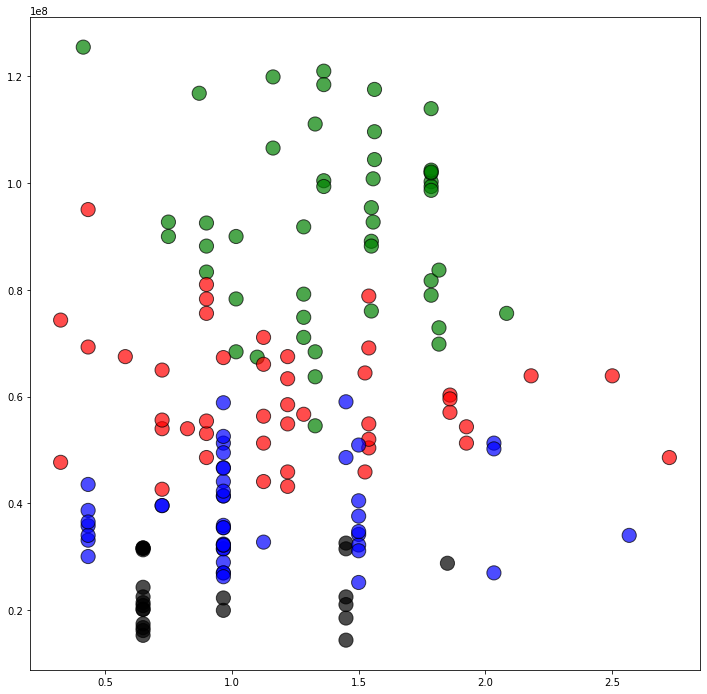

In [411]:
import matplotlib.pyplot as plt
import numpy as np

x = FMTScores['TSCORE']
y = FMTScores['Monetary']
z = FMTScores['Frequency']

fig = plt.figure(figsize=(12, 12))
plt.scatter(x, y,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=FMTScores['Color'])
plt.show()

<Figure size 504x504 with 0 Axes>

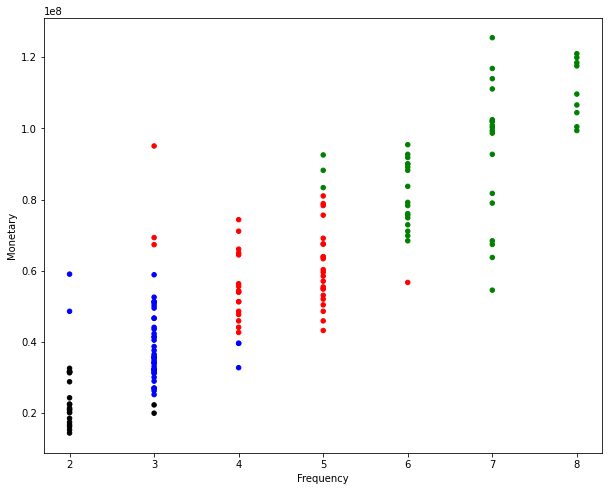

In [397]:
from matplotlib import pyplot as plt
plt.figure(figsize=(7,7))

##Scatter Plot Frequency Vs Recency
Colors = ["red", "green", "blue","black"]
FMTScores['Color'] = FMTScores['Cluster'].map(lambda p: Colors[p])
ax = FMTScores.plot(    
    kind="scatter", 
    x="Frequency", y="Monetary",
    figsize=(10,8),
    c = FMTScores['Color']
)

<Figure size 504x504 with 0 Axes>

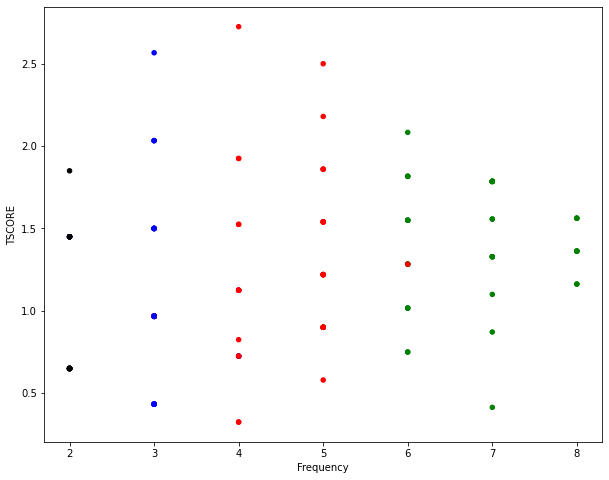

In [398]:
from matplotlib import pyplot as plt
plt.figure(figsize=(7,7))

##Scatter Plot Frequency Vs Recency
Colors = ["red", "green", "blue","black"]
FMTScores['Color'] = FMTScores['Cluster'].map(lambda p: Colors[p])
ax = FMTScores.plot(    
    kind="scatter", 
    x="Frequency", y="TSCORE",
    figsize=(10,8),
    c = FMTScores['Color']
)

<Figure size 504x504 with 0 Axes>

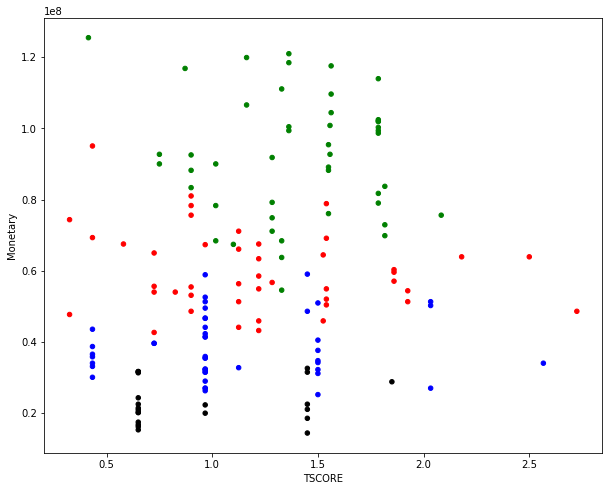

In [399]:
from matplotlib import pyplot as plt
plt.figure(figsize=(7,7))

##Scatter Plot Frequency Vs Recency
Colors = ["red", "green", "blue","black"]
FMTScores['Color'] = FMTScores['Cluster'].map(lambda p: Colors[p])
ax = FMTScores.plot(    
    kind="scatter", 
    x="TSCORE", y="Monetary",    figsize=(10,8),
    c = FMTScores['Color']
)

<Figure size 504x504 with 0 Axes>

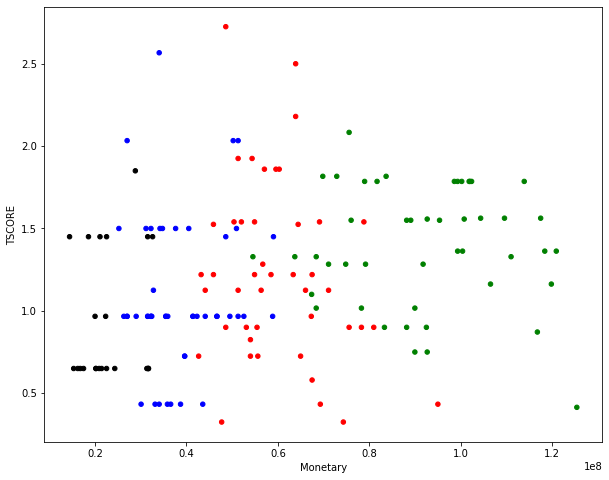

In [400]:
from matplotlib import pyplot as plt
plt.figure(figsize=(7,7))

##Scatter Plot Frequency Vs Recency
Colors = ["red", "green", "blue","black"]
FMTScores['Color'] = FMTScores['Cluster'].map(lambda p: Colors[p])
ax = FMTScores.plot(    
    kind="scatter", 
    x="Monetary", y="TSCORE",
    figsize=(10,8),
    c = FMTScores['Color']
)

<Figure size 504x504 with 0 Axes>

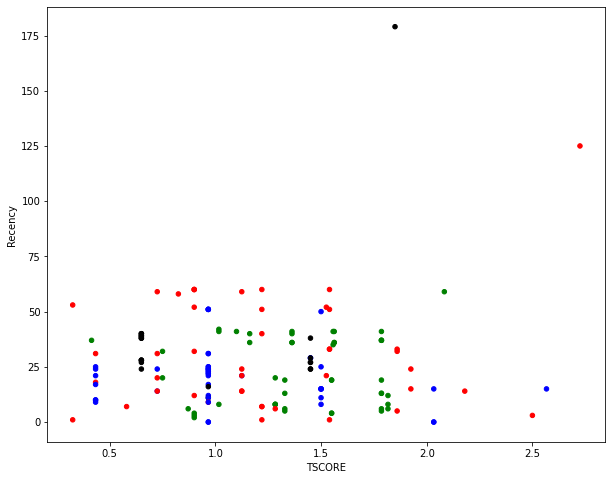

In [406]:
from matplotlib import pyplot as plt
plt.figure(figsize=(7,7))

##Scatter Plot Frequency Vs Recency
Colors = ["red", "green", "blue","black"]
FMTScores['Color'] = FMTScores['Cluster'].map(lambda p: Colors[p])
ax = FMTScores.plot(    
    kind="scatter", 
    x="TSCORE", y="Recency",
    figsize=(10,8),
    c = FMTScores['Color']
)



<Figure size 504x504 with 0 Axes>

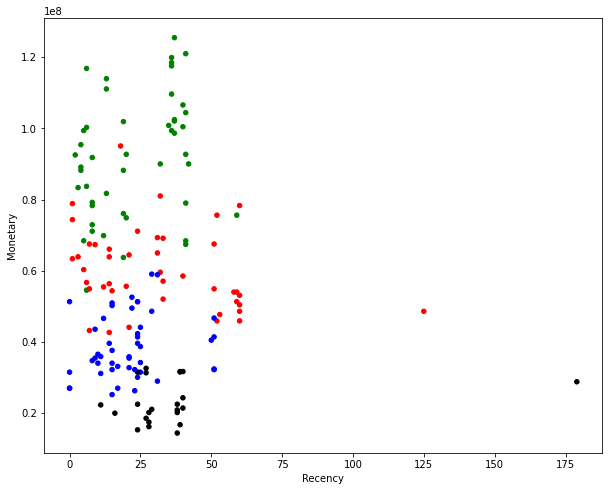

In [407]:
from matplotlib import pyplot as plt
plt.figure(figsize=(7,7))

##Scatter Plot Frequency Vs Recency
Colors = ["red", "green", "blue","black"]
FMTScores['Color'] = FMTScores['Cluster'].map(lambda p: Colors[p])
ax = FMTScores.plot(    
    kind="scatter", 
    x="Recency", y="Monetary",
    figsize=(10,8),
    c = FMTScores['Color']
)

In [408]:
FMTScores.head()

,Frequency,Monetary,TSCORE,Recency,R,F,M,FMTGroup,FMTScore,FMT_Loyalty_Level,Cluster,Color
CUSTOMER ID,,,,,,,,,,,,
110032.0,7.0,54540000.0,1.328571,6,3.7,11.6,120.30,11.6120.31.32857142857142856,136.928571,Gold,1,green
110033.0,7.0,100260000.0,1.785714,6,3.7,11.6,180.45,11.6180.451.78571428571428586,197.535714,Platinum,1,green
110034.0,7.0,116820000.0,0.871429,6,3.7,11.6,200.50,11.6200.50.87142857142857166,216.671429,Platinum,1,green
110035.0,7.0,99360000.0,1.785714,5,5.0,11.6,180.45,11.6180.451.78571428571428585,198.835714,Platinum,1,green
110036.0,7.0,68400000.0,1.328571,5,5.0,11.6,140.35,11.6140.351.32857142857142855,158.278571,Gold,1,green


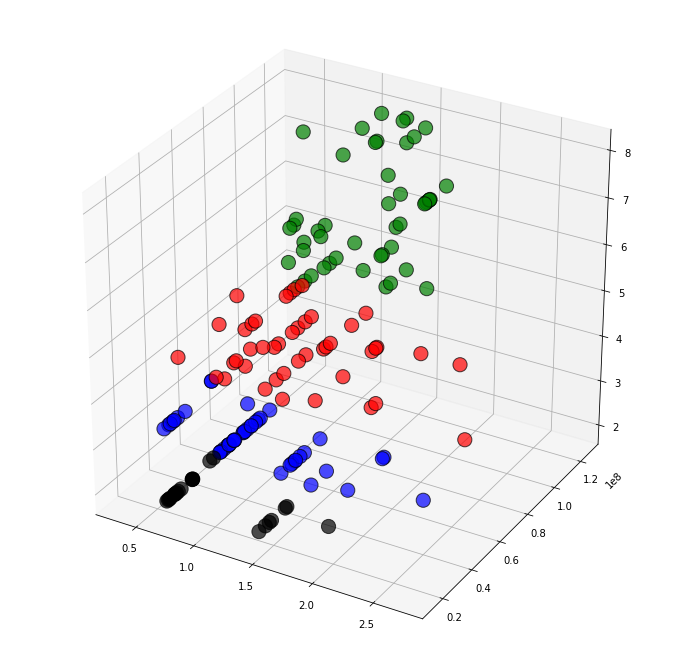

In [409]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

x = FMTScores['TSCORE']
y = FMTScores['Monetary']
z = FMTScores['Frequency']

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=FMTScores['Color'])
plt.show()